# EDA using data functions with Python

## Import packages and libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [ ]:
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [ ]:
df.shape

(3401012, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


## Convert data column to datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'])

## Calculate the days with most stikes

As part of discovering, you want to get an idea of the highest data points. For this dataset, we can calculate the top 10 days of 2018 with the most number of lightning strikes using the **groupby()**, **sum()**, and **sort_values()** functions from pandas.

When using **groupby()** on the date column, the function combines all rows with the same date into a single row.
Then, using **sum()** performs a sum calculation on all other summable columns. In this case, we are summing all the lightning strikes that happened on each day. Notice that the center_point_geom column is not included in the output. That's because, as a string object, this column is not summable.

Finally, **sort_values()** returns the results in descending order of total strikes for each day in the data.

In [ ]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)

,number_of_strikes,center_point_geom
date,,
2018-08-29,1070457,POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...
2018-08-17,969774,POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...
2018-08-28,917199,POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...
2018-08-27,824589,POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...
2018-08-30,802170,POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...
2018-08-19,786225,POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...
2018-08-18,741180,POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...
2018-08-16,734475,POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...
2018-08-31,723624,POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...


In [ ]:
df.groupby(['date'])['number_of_strikes'].sum().sort_values(ascending=False).head(10)

,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


## Extract the month data

In [ ]:
# Create a new 'month' columns
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [ ]:
## Calculate number of strike per months
df.groupby(['month']).sum(['number_of_strikes']).sort_values('month',ascending = True).head(12)

,number_of_strikes
month,
1,860045
2,2071315
3,854168
4,1524339
5,4166726
6,6445083
7,8320400
8,15525255
9,3018336


In [ ]:
# Calculate total number of strikes per month
## Cousera version
df.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)

TypeError: datetime64 type does not support sum operations

## Convert month number to text

In [ ]:
##
df['month_txt'] = df['date'].dt.month_name().str.slice(stop = 3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


## Create new dataframe

The objective is to **plot the total number of strikes per month as a bar graph**. To help with the plotting, we will create a new dataframe called **df_by_month**. This will allow us to easily access the month, month text, and total number of strikes for each month.

In [ ]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month', 'month_txt']).sum('number_of_strikes').sort_values('month', ascending = True).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


In [ ]:
# Create a new helper dataframe for plotting.
## Cousera Version
df_by_month = df.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_by_month

NameError: name 'df' is not defined

## Make a bar chart

Now, let's make a bar chart. Pyplot's **plt.bar()** function takes positional arguments of *x* and *height*, representing the data used for the x- and y- axes, respectively. The x-axis will represent months, and the y-axis will represent strike count.

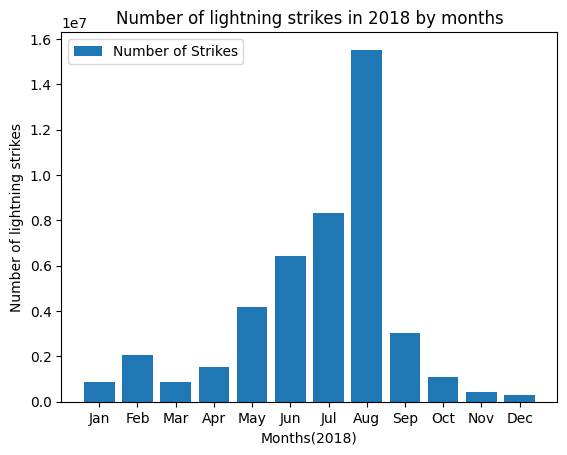

In [ ]:
plt.bar(x=df_by_month['month_txt'],height=df_by_month['number_of_strikes'], label = "Number of Strikes")
plt.plot

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

# Activity : Discover What in your Dataset

## Step 1 : Import

### Import libraries and packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### Load dataset into a DataFrame

In [ ]:
# Load data from the csv file into a DataFrame and save in a variable

companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2 : Data exploration

### Display the first 10 rows of the data

In [ ]:
# Display the first 10 rows of the data

companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


*Question* : **What do you think the "Date Joined" column represents?**

The "Date Joined" column represents when the company became a "unicorn," reaching one billion dollars in valuation.

*Question* : **What do you think the "Select Investors" column represents?**

The "Select Investors" column represents the top investors in the company.

### Assess the size of the dataset

In [ ]:
# How large the dataset is

companies.size

10740

*Question* :  What do you notice about the size of the dataset?

The size of the dataset is 10740. This means that there are 10740 values in total across the whole dataset.

### Determine the shape of dataset

In [ ]:
# Shape of the dataset

companies.shape

(1074, 10)

*Question* : **What do you notice about the shape of the dataset?**

- The shape of the dataset is (1074, 10). The first number, 1074, represents the number of rows (also known as entries). The second number, 10, represents the number of columns. According to this dataset, there are 1074 unicorn companies as of March 2022, and this dataset also shows 10 aspects of each company.

### Get basic inforamation about dataset

In [ ]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


*Question*: **What do you notice about the type of data in the Year Founded column? Refer to the output from using info() above. Knowing the data type of this variable is helpful because it indicates what types of analysis can be done with that variable, how it can be aggregated with other variables, and so on.**

- Dtype is listed as int64 in the Year Founded column. This means that the year a company was founded is represented as an integer.

*Question*: **What do you notice about the type of data in the Date Joined column? Refer to the output from using info() above. Knowing the data type of this variable is helpful because it indicates what types of analysis can be done with that variable and how the variable can be transformed to suit specific tasks.**

- Dtype is listed as object for the Date Joined column. This means that the date a company became a unicorn is represented as an object.

## Step 3 : Statistical Tests

### Find descriptive statistcs

Find descriptive statistics and structure your dataset. The **describe()** function from the **pandas** library can help. This function generates statistics for the numeric columns in a dataset.

In [ ]:
### Get descriptive statistics

companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


*Question*: **Based on the table of descriptive stats generated above, what do you notice about the minimum value in the Year Founded column? This is important to know because it helps you understand how early the entries in the data begin.**

- The minimum value in the Year Founded column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.

*Question*: **What do you notice about the maximum value in the Year Founded column? This is important to know because it helps you understand the most recent year captured by the data.**

- The maximum value in the Year Founded column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

### Convert Date Joined column to datetime

- Use **pd.to_datetime()** to convert the "Date Joined" column to datetime.

- Update the column with the converted values.

- Use **.info()** to confirm that the update actually took place

You can use the **to_datetime()** function from the pandas library. This splits each value into year, month, and date components. This is an important step in data cleaning, as it makes the data in this column easier to use in tasks you may encounter. To name a few examples, you may need to compare "date joined" between companies or determine how long it took a company to become a unicorn. Having "date joined" in datetime form would help you complete such tasks.

In [ ]:
# Step 1. Use pd.to_datetime() to convert Date Joined column to datetime
# Step 2. Update the column with the converted values

companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

<ipython-input-9-0ce9a81f74c1>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


In [ ]:
# Use .info() to confirm that the update actually took place

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


### Create Year Joined column

In [ ]:
# Step 1: Use .dt.year to extract year component from Date Joined column
# Step 2: Add the result as a new column named Year Joined to the DataFrame

companies["Year Joined"] = companies["Date Joined"].dt.year

In [ ]:
# Use .head() to confirm that the new column did get added

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


## Step 4 : Results and evaluation

### Take a sample of the data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But you may encounter scenarios in the future where you will need to take a sample of the data due to time and resource limitations. For the purpose of developing your skills around sampling, take a sample of the data and work with that sample for the next steps of analysis you want to conduct.
- Use the **sample()** function for this task.
Use **sample()** with the ***n*** parameter set to ***50*** to randomly sample 50 unicorn companies from the data. Be sure to specify the **random_state** parameter to ensure reproducibility of your work. Save the result to a variable called **companies_sampled**.

In [ ]:
# Sample the data

### YOUR CODE HERE ###
companies_sample = companies.sample(n = 50, random_state = 42)

### **Visualize the time it took companies to reach unicorn status**

Visualize the longest time it took companies to reach unicorn status for each industry represented in the sample. To create a bar plot to visualize this, use the **bar()** function from the **matplotlib.pyplot** module. You'll first need to prepare the data.

In [ ]:
# Prepare data for plotting

### YOUR CODE HERE ###

# Create new `years_till_unicorn` column
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


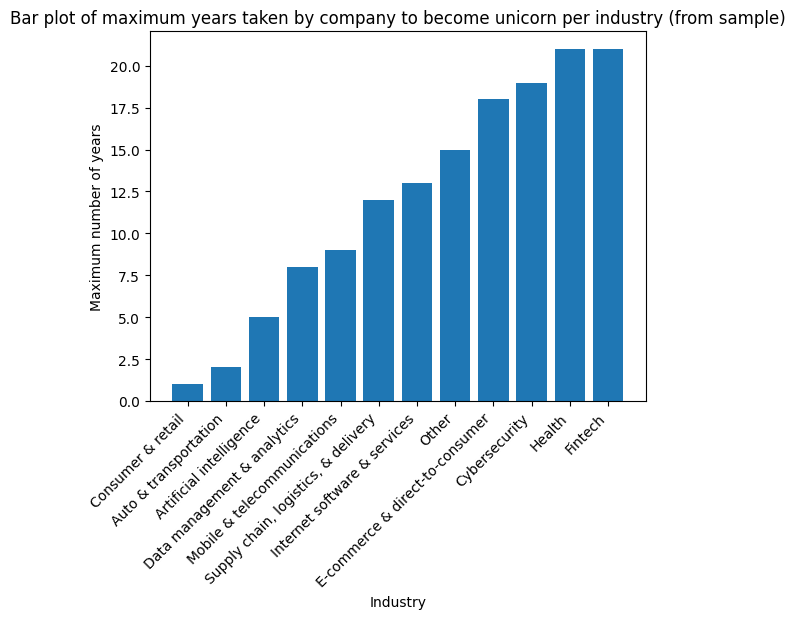

In [ ]:
# Create bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars

### YOUR CODE HERE ###

plt.bar(grouped.index, grouped["years_till_unicorn"])

# Set title

### YOUR CODE HERE ###

plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")

# Set x-axis label

### YOUR CODE HERE ###

plt.xlabel("Industry")

# Set y-axis label

### YOUR CODE HERE ###

plt.ylabel("Maximum number of years")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text

### YOUR CODE HERE ###

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot

### YOUR CODE HERE ###

plt.show()

**Question** : *What do you observe from this bar plot?*

This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

### Visualize the maximum unicorn company valuation per industry

Visualize unicorn companies' maximum valuation for each industry represented in the sample. To create a bar plot to visualize this, use the **bar()** function from the **matplotlib.pyplot** module. Before plotting, create a new column that represents the companies' valuations as numbers (instead of strings, as they're currently represented). Then, use this new column to plot your data.

In [ ]:
# Create a column representing company valuation as numeric data

# Create new column
companies_sample['valuation_billions'] = companies_sample['Valuation']
# Remove the '$' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
# Remove the 'B' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')
# Convert column to type int
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


Now, prepare the data for modeling by performing the necessary calculations on it.

In [ ]:
# Prepare data for modeling
grouped = (companies_sample
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_billions",ascending = False)
          )
grouped

,Company,Valuation,Date Joined,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
Industry,,,,,,,,,,,,
Artificial intelligence,OpenAI,$3B,2021-09-22,Shanghai,United States,North America,2017,$1B,"Northern Light Venture Capital, Xiaomi, Future...",2021,5,12
Fintech,HighRadius,$6B,2021-10-28,San Francisco,United States,North America,2018,$629M,"The Carlyle Group, CVC Capital Partners",2021,21,10
Mobile & telecommunications,Cambridge Mobile Telematics,$7B,2020-09-23,San Francisco,United States,North America,2016,$863M,SoftBank Group,2020,9,7
Internet software & services,Zenoti,$5B,2022-03-23,Tel Aviv,United States,North America,2020,$559M,"Y Combinator, Accel, T. Rowe Price",2022,13,5
E-commerce & direct-to-consumer,Zwift,$4B,2021-06-08,San Francisco,United States,North America,2018,Unknown,Sequoia Capital,2021,18,4
Data management & analytics,YugaByte,$4B,2021-10-28,Sunnyvale,United States,North America,2017,$352M,"Lightspeed Venture Partners, Dell Technologies...",2021,8,4
Cybersecurity,Kaseya,$3B,2021-03-01,New York,United States,North America,2017,$545M,"Vertex Ventures Israel, Bessemer Venture Partn...",2021,19,3
Health,MindMaze,$3B,2021-02-19,Tirat Carmel,United States,North America,2014,$633M,"York Capital Management, GE Healthcare, Koch D...",2021,21,3
Other,Uplight,$2B,2021-03-03,Fort Mill,United States,North America,2019,Unknown,"Silver Lake Partners, General Atlantic",2021,15,2


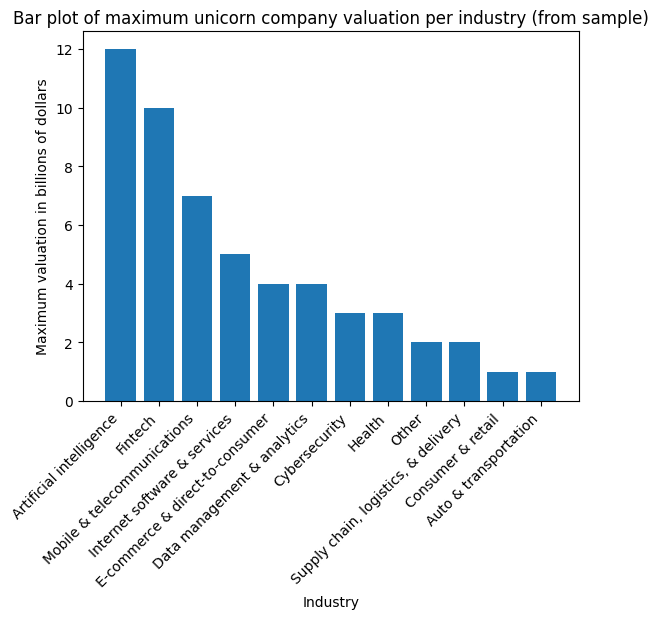

In [ ]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars

### YOUR CODE HERE ###

plt.bar(grouped.index, grouped["valuation_billions"])

# Set title

### YOUR CODE HERE ###

plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")

# Set x-axis label

### YOUR CODE HERE ###

plt.xlabel("Industry")

# Set y-axis label

### YOUR CODE HERE ###

plt.ylabel("Maximum valuation in billions of dollars")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text

### YOUR CODE HERE ###

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot

### YOUR CODE HERE ###

plt.show()

**Question**: *What do you observe from this bar plot?*

This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Auto & transportation, and Consumer & retail industries.

# Data String Manipulations with Python

## Import libraries and packages

In [ ]:
### Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
## Read the data
df = pd.read_csv("eda_manipulate_date_strings_with_python.csv")
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


## Create new time columns

In [ ]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

Next, let's create four new columns: *week, month, quarter*, and *year*. We can do this by using the **datetime.strftime()** method of the datetime object. strftime is short for "string format time." We will use this method on the datetime data in the week column, and it will extract the information we specify, formatted as a string.

To specify the information to extract, we will use strftime format codes. You can find a full list of available codes to use in the strftime format codes documentation. In this case, we will use **%Y** for year, **%V** for week number, **%q** for quarter.


In [ ]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [ ]:
df.head()

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016


## Plot the number of weekly lightning strikes in 2018
Next, we will plot the number of weekly lightning strikes. Let's start by filtering the original dataset to 2018. We will use the **groupby()** and **sum()** functions to get the number of strikes per week.

In [ ]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum('numeric_only=True').reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


Now we have a table of exactly what we need to plot the weekly lightning strike totals of 2018. We will use the **plt.bar()** function to plot the bar graph. Within the argument field, let's input the *x-axis (the week column)*, then input the *y-axis (or height)* as the number_of_strikes column.

We will use **plt.xlabel()**, **plt.ylabel()**, and **plt.title()** to add appropriate text to the graph.

Text(0.5, 1.0, 'Number of Lightning Strikes per week 2018')

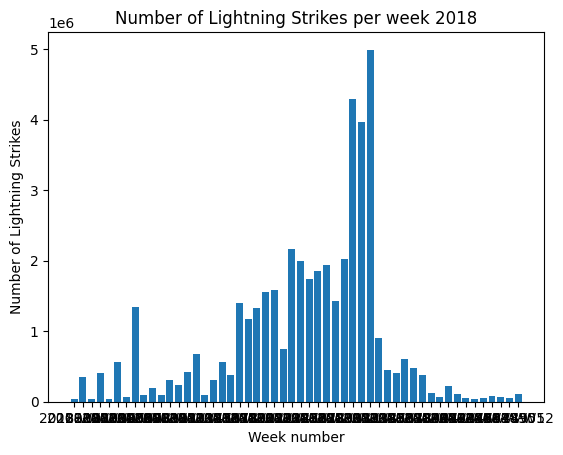

In [ ]:
# Plot a bar graph of weekly strike totals in 2018.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel('Week number')
plt.ylabel('Number of Lightning Strikes')
plt.title('Number of Lightning Strikes per week 2018')

### Adjust the graph size

We now have a graph, but we can't read the x-axis labels. To fix this problem, first we will make it bigger by using **plt.figure(figsize=(20, 5))**. This will change the size to 20 inches wide by 5 inches tall.
Next, we will use the **plt.xticks()** function to access the tick labels on the x-axis. Using the rotation and fontsize keyword arguments, rotate the labels and make the font smaller.

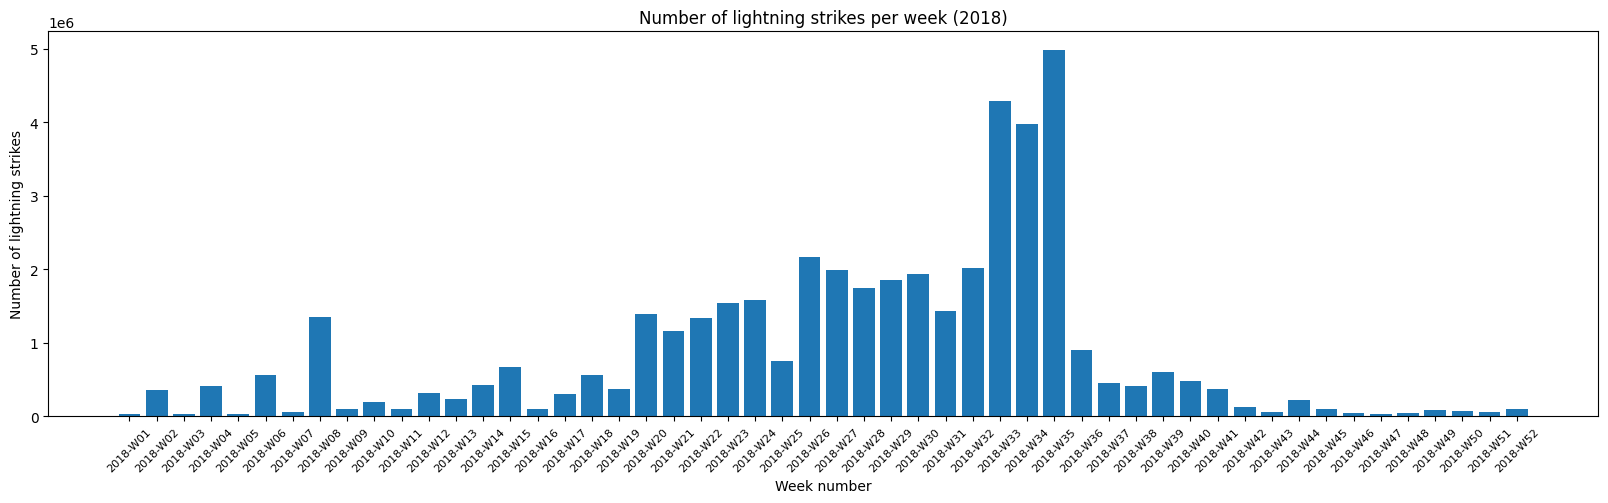

In [ ]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

## Plot the number of quarterly lightning strikes from 2016–2018

In [ ]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

,number_of_strikes
0,0.000016
1,0.000016
2,0.000016
3,0.000016
4,0.000016


### Format the numbers
This alone does not help much, because it just moved the decimal to the left. We will need to format the numbers as well. Let's begin by grouping the data by quarter and summing.

Then, we will create a *number_of_strikes_formatted* column in the resulting dataframe by dividing by one million but also rounding to one digit after the decimal point, converting it to a string, and adding "M" to the end to represent millions.

In [ ]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum('numeric_only=True').reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### Add labels

Before we start plotting, let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses **plt.text()**, which is a pyplot function whose positional arguments are *x, y,* and *s. x* represents the x-axis coordinates, y represents the y-axis coordinates, and s represents the text that we want to appear at these coordinates.

In [ ]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

### Plot the bar graph

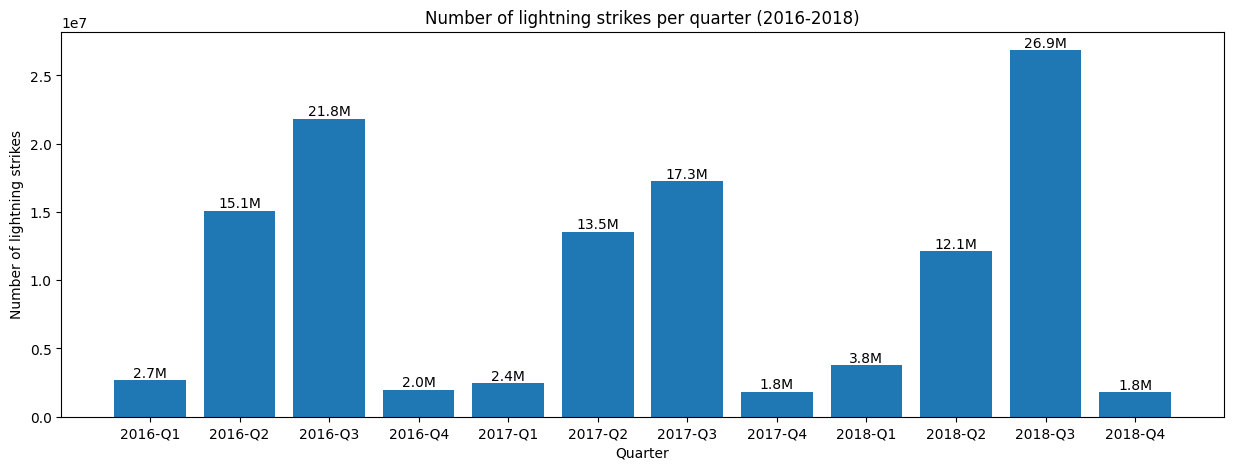

In [ ]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

### Create a grouped bar chart

In [ ]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


### Fill in the chart parameters

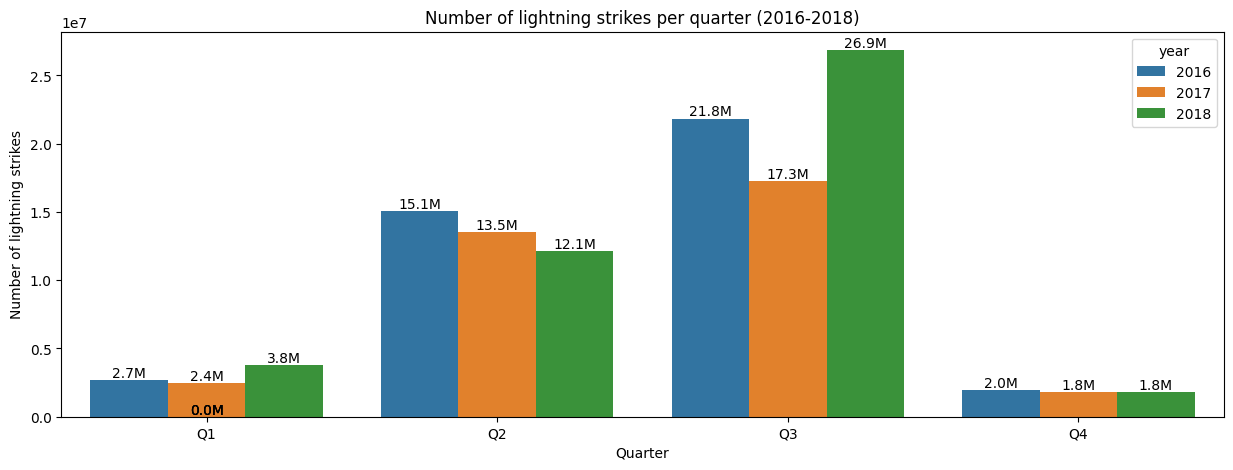

In [ ]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M',
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
                   ha = 'center', va = 'bottom',
                   xytext = (0, -12),
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

# EDA structuring with Python

### Import packages and libraries

In [ ]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

### Organize the data

In [ ]:
# Read in the 2018 data.
df = pd.read_csv('eda_structuring_with_python_dataset1.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Just like the data you encountered previously, this dataset has three columns: **date, number_of_strikes,** and **center_point_geom**. Start by converting the **date** column to *datetime*.

In [ ]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

Now, let's check the shape of the dataframe.

In [ ]:
df.shape

(2328620, 3)

Check for **duplicates**. If the shape of the data is different after running this code, you will know there were duplicate rows.

In [ ]:
df.drop_duplicates().shape

(2328620, 3)

The shape of the dataset after dropping duplicates is the same, so you can assume there are no duplicates. Hence, there is at most one row per date, per area, and per number of strikes.

## Locations with most strikes in a single day

To identify the locations with the most strikes in a single day, we will sort the number_of_strikes column in descending value, or by most to least strikes.

In [ ]:
# Sort by number of strikes in descending order.
df.sort_values(by = 'number_of_strikes', ascending = False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


## Locations with most days with at least one lightning strike

To find the number of days that a given geographic location had at least one lightning strike, we will use the **value_counts(**) function on the *center_point_geom* column. The logic is that if each row represents a location-day, then counting the number of times each location occurs in the data will give you the number of days that location had lightning.

In [ ]:
# Identify the locations that appear most in the dataset.
df['center_point_geom'].value_counts()

,count
center_point_geom,
POINT(-81.9 22.9),81
POINT(-82.3 22.9),80
POINT(-81.5 22.5),79
POINT(-82 22.9),77
POINT(-82.5 22.9),77
...,...
POINT(-111.3 47.9),1
POINT(-119 48.6),1
POINT(-69.2 47.9),1


The locations with the most days with lightning strikes had at least one strike on 108 days—nearly one out of every three days of the year. These locations are all rather close to each other geographically. Notice also that the **value_counts()** function automatically sorts the results in descending order.

Now we will examine whether there is an even distribution of values, or whether 108 strikes is an unusually high number of days with lightning strikes. We will use the **value_counts()** function again, but this time we will output the top 20 results. We will also rename the columns and apply a color gradient.

In [ ]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-81.9 22.9),81
1,POINT(-82.3 22.9),80
2,POINT(-81.5 22.5),79
3,POINT(-82 22.9),77
4,POINT(-82.5 22.9),77
5,POINT(-82.5 22.8),76
6,POINT(-82.1 22.8),76
7,POINT(-84.3 22.3),74
8,POINT(-84.2 22.3),74
9,POINT(-80.9 22.4),74


## Lightning strikes by day of week

In [ ]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


In [ ]:
# Calculate the mean count of lightning strikes for each weekday.
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,14.030929
Monday,13.798613
Saturday,13.211725
Sunday,12.631167
Thursday,13.930108
Tuesday,14.713821
Wednesday,13.861236


It seems that Saturday and Sunday have fewer lightning strikes on average than the other five weekdays. We will plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot.

We will begin by defining the order of the days, starting with Monday and ending with Sunday. This is how the days will be ordered in the plot we create.

In [ ]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Now, we will code the plot. Remember that showfliers is the parameter that controls whether or not outliers are displayed in the plot. If we input **True**, outliers are included; if we input **False**, outliers are left off of the box plot.

Keep in mind, we aren’t *deleting* any outliers from the dataset when we create this chart—we are only excluding them from the visualization.

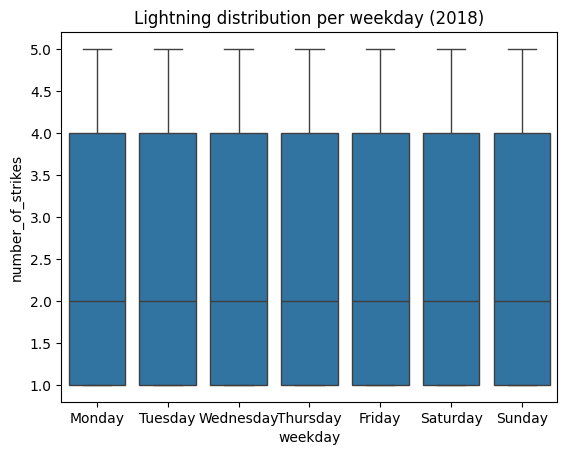

In [ ]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df,
            x='weekday',
            y='number_of_strikes',
            order=weekday_order,
            showfliers=False
            );
g.set_title('Lightning distribution per weekday (2018)');

Notice that the median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are both lower than they are during the rest of the week. We also know that the mean numbers of strikes that occurred on Saturday and Sunday were lower than on the other weekdays. Why might this be? Perhaps the aerosol particles emitted by factories and vehicles increase the likelihood of lightning strikes. In the U.S., Saturday and Sunday are days that many people don't work, so there may be fewer factories operating and fewer cars on the road. This is only speculation, but it's one possible path for further exploration.

## Monthly lightning strikes 2016–2018

Finally, we will examine monthly lightning strike data from 2016–2018. We will calculate the percentage of total lightning strikes for each year that occurred in a given month. We will then plot this data on a bar graph.

In [ ]:
# Import 2016–2017 data
df_2 = pd.read_csv('eda_structuring_with_python_dataset2.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


The data is in the same format as the 2018 data when we imported it previously. Now, we will convert the date column to datetime.

In [ ]:
# Convert `date` column to datetime.
df_2['date'] = pd.to_datetime(df_2['date'])

Now we can combine the 2016–2017 dataframe with the 2018 dataframe. There are several functions that can do this. We will use **concat()**. Remember that the 2018 data has two added columns: week and weekday. To simplify the results of our combined dataframe, we will drop these added columns during the concatenation. Note that the following code doesn't permanently modify df. The columns drop only for this operation. You can learn more about the **concat()** function in the pandas.concat documentation.

In [ ]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


To help us name the bars of the bar plot, we will create three new columns that isolate the year, month number, and month name.

In [ ]:
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


Let's check the overall lightning strike count for each year.

In [ ]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,31970315


Now we will calculate the percentage of total lightning strikes that occurred in a given month for each year and assign the results to a new dataframe called lightning_by_month.

In [ ]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

<ipython-input-18-06ccca0b6016>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_month = union_df.groupby(['month_txt','year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1040028
3,August,2016,7250442
4,August,2017,6021702


We can use the agg() function to calculate the same yearly totals we found before, with 2017 having fewer strikes than the other two years.

In [ ]:
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

<ipython-input-19-dc4b96d140d5>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,31970315


In our bar plot, we need to use the monthly totals to calculate percentages. For each month, we will need the monthly total strike count and the total strike count for that year. Let's create another dataframe called *percentage_lightning* that adds a new column called *year_strikes* which represents the total number of strikes for each year. We can do this using the **merge()** function. We will merge the *lightning_by_month* dataframe with the *lightning_by_year* dataframe, specifying to merge on the year column. This means that wherever the year columns contain the same value in both dataframes, a row is created in our new dataframe with all the other columns from both dataframes being merged. To learn more about this function, refer to the pandas.merge documentation.

In [ ]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,April,2017,3819075,35095195
2,April,2018,1040028,31970315
3,August,2016,7250442,41582229
4,August,2017,6021702,35095195


Now we will create a new column in our new dataframe that represents the percentage of total lightning strikes that occurred during each month for each year. We will do this by dividing the number_of_strikes column by the year_strikes column and multiplying the result by 100.

In [ ]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,April,2017,3819075,35095195,10.882045
2,April,2018,1040028,31970315,3.253105
3,August,2016,7250442,41582229,17.436396
4,August,2017,6021702,35095195,17.158195


Now we can plot the percentages by month in a bar graph.

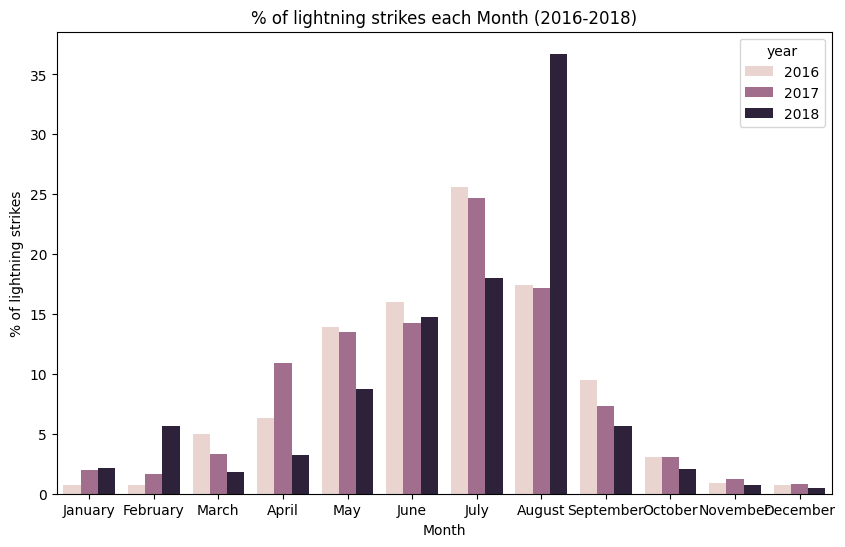

In [ ]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");

# Activity : Struture your data

## Step 1 : Imports

###Import relevant libraries and modules

In [ ]:
# Import the relevant Python libraries and modules needed in this lab.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset into a DataFrame

In [ ]:
# Load the dataset provided into a DataFrame.

companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2 : Data exploration

### Display the first 10 rows of the data

In this section, you will discover what the dataset entails and answer questions to guide your exploration and analysis of the data. This is an important step in EDA.

To begin, display the first 10 rows of the data to get an understanding of how the dataset is structured.

In [ ]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


### Identify the number of rows and columns

Identify the number of rows and columns in the dataset. This will help you get a sense of how much data you are working with.

In [ ]:
companies.shape

(1074, 10)

### Check for duplicates in the data

In [ ]:
companies.drop_duplicates().shape

(1074, 10)

### Display the data types of the columns

Knowing the data types of the columns is helpful because it indicates what types of analysis and aggregation can be done, how a column can be transformed to suit specific tasks, and so on. Display the data types of the columns.

In [ ]:
companies.dtypes

,0
Company,object
Valuation,object
Date Joined,object
Industry,object
City,object
Country/Region,object
Continent,object
Year Founded,int64
Funding,object
Select Investors,object


### Sort the data

In this section, you will continue your exploratory data analysis by structuring the data. This is an important step in EDA, as it allows you to glean valuable and interesting insights about the data afterwards.

To begin, sort the data so that you can get insights about when the companies were founded. Consider whether it would make sense to sort in ascending or descending order based on what you would like to find.

In [ ]:
# To arrange the data from latest to earliest `Year Founded`
companies.sort_values(by="Year Founded", ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."
396,candy.com,$2B,10/21/21,Fintech,New York,United States,North America,2021,$100M,"Insight Partners, Softbank Group, Connect Vent..."
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."


### Determine the number of companies founded each year

Find out how many companies in this dataset were founded each year. Make sure to display each unique Year Founded that occurs in the dataset, and for each year, a number that represents how many companies were founded then.

In [ ]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

companies["Year Founded"].value_counts().sort_values(ascending=False)

,count
Year Founded,
2015,155
2016,110
2014,109
2012,95
2013,87
2011,82
2017,74
2018,61
2019,45


### Plot a histogram of the Year Founded feature.

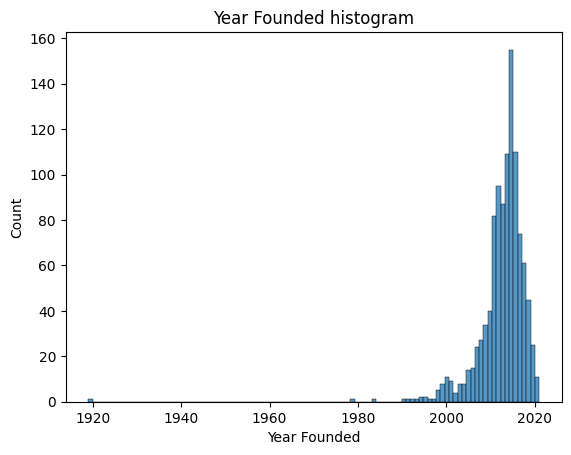

In [ ]:
sns.histplot(data=companies, x='Year Founded')
plt.title('Year Founded histogram');

### Convert the Date Joined column to datetime

Convert the Date Joined column to datetime. This will split each value into year, month, and date components, allowing you to later gain insights about when a company gained unicorn status with respect to each component.

In [ ]:
# Convert `Date Joined` column to datetime.
# Update the column with the converted values.

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])


# Display the data types of the columns in `companies`
# to confirm that the update actually took place

companies.dtypes

<ipython-input-10-c6b8abf30878>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])


,0
Company,object
Valuation,object
Date Joined,datetime64[ns]
Industry,object
City,object
Country/Region,object
Continent,object
Year Founded,int64
Funding,object
Select Investors,object


### Create a Month Joined column
Obtain the names of the months when companies gained unicorn status, and use the result to create a Month Joined column.

In [ ]:
# Obtain the names of the months when companies gained unicorn status.
# Use the result to create a `Month Joined` column.

companies["Month Joined"] = companies["Date Joined"].dt.month_name()


# Display the first few rows of `companies`
# to confirm that the new column did get added.

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


### Create a Years To Join column
Determine how many years it took for companies to reach unicorn status, and use the result to create a Years To Join column. Adding this to the dataset can help you answer questions you may have about this aspect of the companies.

In [ ]:
# Determine how many years it took for companies to reach unicorn status.
# Use the result to create a `Years To Join` column.

companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Year Founded"]


# Display the first few rows of `companies`
# to confirm that the new column did get added.

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


### Gain more insight on a specific year
To get more insight on the year of that interests you, filter the dataset by that year and save the resulting subset into a new variable.

In [ ]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable .

companies_2021 = companies[companies["Date Joined"].dt.year == 2021]


# Display the first few rows of the subset to confirm that it was created

companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


### Observe trends over time
Implement the structuring approach that you have identified to observe trends over time in the companies that became unicorns for the year that interests you.

In [ ]:
# After identifying the time interval that interests you, proceed with the following:
# Step 1. Take the subset that you defined for the year of interest.
#         Insert a column that contains the time interval that each data point belongs to, as needed.
# Step 2. Group by the time interval.
#         Aggregate by counting companies that joined per interval of that year.
#         Save the resulting DataFrame in a new variable.

# Insert a `Week Joined` column into `companies_2021.`
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

# Group `companies_2021` by `Week Joined`.
# Aggregate by counting companies that joined per week of 2021.
# Save the resulting DataFrame in a new variable.
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

# Display the first few rows of the new DataFrame to confirm that it was created.

companies_by_week_2021.head()



,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


### Compare trends over time
Implement the structuring approach that you have identified in order to compare trends over time in the average valuation of companies that became unicorns between your years of interest. Keep in mind the data type of the Valuation column and what the values in that column contain currently.

In [ ]:
# After identifying the additional year and time interval of interest, proceed with the following:
# Step 1. Filter by the additional year to create a subset that consists of companies that joined in that year.
# Step 2. Concatenate that new subset with the subset that you defined previously.
# Step 3. As needed, add a column that contains the time interval that each data point belongs to,
#         in the concatenated DataFrame.
# Step 4. Transform the `Valuation` column as needed.
# Step 5. Group by the time interval.
#         Aggregate by computing average valuation of companies that joined per interval of the corresponding year.
#         Save the resulting DataFrame in a new variable.

# Filter by the additional year to create a subset that consists of companies that joined in that year.
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `companies_2021`.
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
companies_2020_2021["Valuation"] =  companies_2020_2021["Valuation"].str.strip("$B").astype(float)

# Group `companies_2020_2021` by `Quarter Joined`,
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Display the first few rows of the new DataFrame to confirm that it was created.

companies_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


## Step 3: Time-to-unicorn visualization

### Visualize the time it took companies to become unicorns
As a next step, visualize your data. Using the companies dataset, create a box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.

In [ ]:
# Define a list that contains months in chronological order.

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November",
               "December"]

# Print out the list to confirm it is correct.

print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


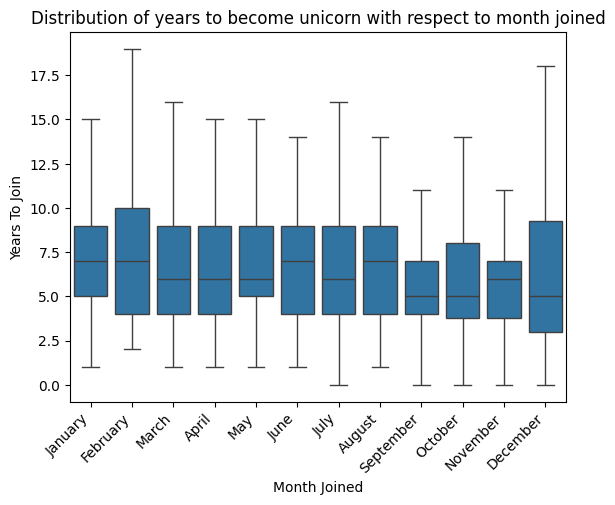

In [ ]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.

sns.boxplot(x=companies['Month Joined'],
            y=companies['Years To Join'],
            order=month_order,
            showfliers=False)

# Set the title of the plot.

plt.title('Distribution of years to become unicorn with respect to month joined')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text.


plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.


plt.show()

## Step 4: Results and evaluation

### Visualize the time it took companies to reach unicorn status
In this section, you will evaluate the result of structuring the data, making observations, and gaining further insights about the data.

Using the companies dataset, create a bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded.

<ipython-input-18-3b5804e71168>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=companies["Year Founded"], y=companies["Years To Join"], ci=False)


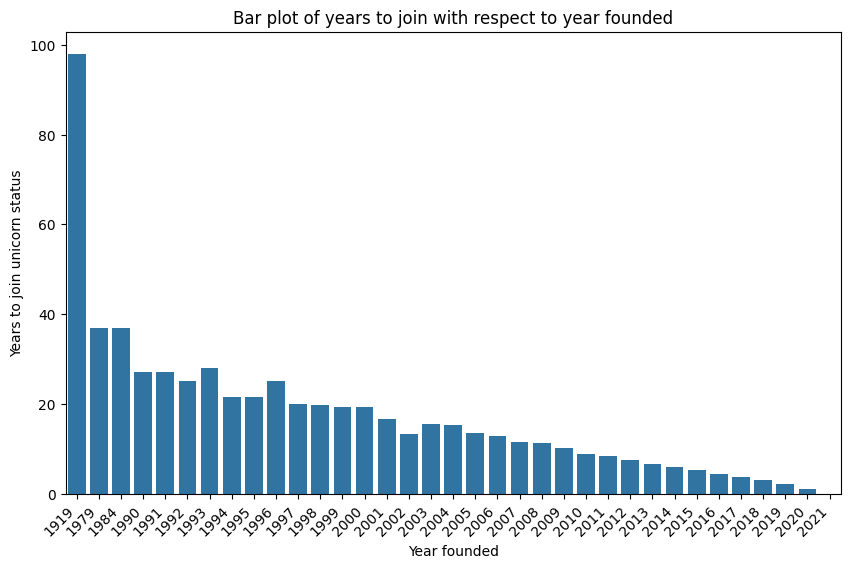

In [ ]:
# Set the size of the plot.


plt.figure(figsize=(10,6))


# Create bar plot to visualize the average number of years it took companies to reach unicorn status
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.


sns.barplot(x=companies["Year Founded"], y=companies["Years To Join"], ci=False)


# Set title

plt.title("Bar plot of years to join with respect to year founded")


# Set x-axis label

plt.xlabel("Year founded")


# Set y-axis label

plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.

plt.show()

### Visualize the number of companies that joined per interval
Using the subset of companies joined in the year of interest, grouped by the time interval of your choice, create a bar plot to visualize the number of companies that joined per interval for that year.

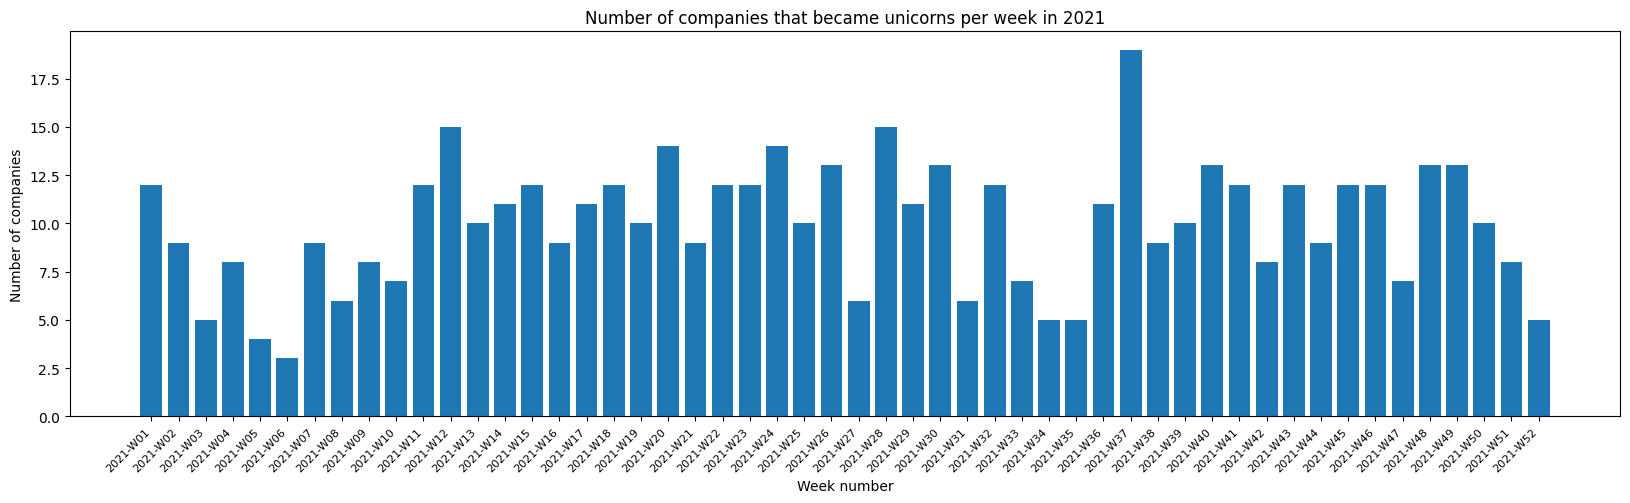

In [ ]:
# Set the size of the plot.

plt.figure(figsize = (20, 5))

# Create bar plot to visualize number of companies that joined per interval for the year of interest.

plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()

# Set the x-axis label.

plt.xlabel("Week number")

# Set the y-axis label.

plt.ylabel("Number of companies")

# Set the title.

plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.

plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

# Display the plot.

plt.show()

### Visualize the average valuation over the quarters

Using the subset of companies that joined in the years of interest, create a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval. There will be two bars for each time interval. This allows you to compare quarterly values between the two years.

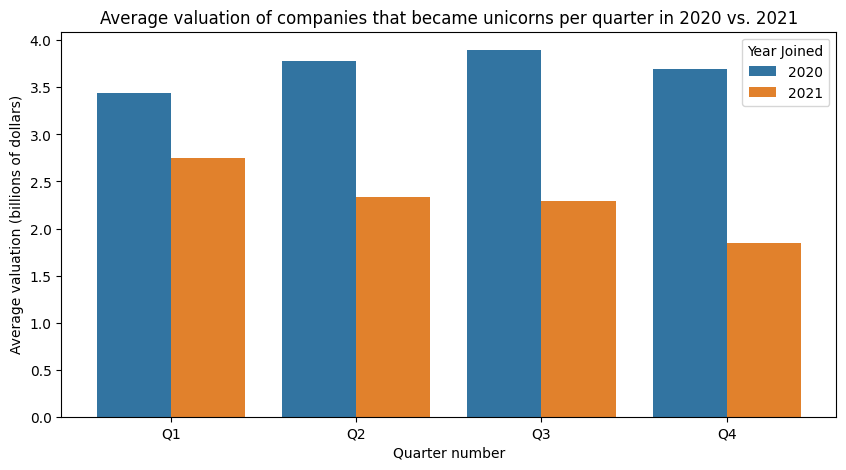

In [ ]:
# Using slicing, extract the year component and the time interval that you specified,
# and save them by adding two new columns into the subset.

companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

# Set the size of the plot.

plt.figure(figsize = (10, 5))

# Create a grouped bar plot.


sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()

# Set the x-axis label.


plt.xlabel("Quarter number")

# Set the y-axis label.

plt.ylabel("Average valuation (billions of dollars)")

# Set the title.

plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.

plt.show()